## Algerian Forest Fires Dataset
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
dataset.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [3]:
dataset['month'].unique()

array(['06', '07', '08', '09', nan, 'month'], dtype=object)

In [4]:
dataset[dataset.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

In [5]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [7]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    Region  
0  not fire        0.0  
1  not fire        0.0  
2  not fire        0.0  
3  not fire        0.0  
4  not fire        0.0

In [8]:
df[['Region']] = df[['Region']].astype(int)

In [9]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    Region  
0  not fire          0  
1  not fire          0  
2  not fire          0  
3  not fire          0  
4  not fire          0

In [10]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [11]:
df = df.dropna().reset_index(drop=True)

In [12]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
df.iloc[[122]]

day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI  \
122  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

     FWI  Classes    Region  
122  FWI  Classes         1

In [14]:
df = df.drop(122).reset_index(drop=True)

In [15]:
df.iloc[[122]]

day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  BUI  FWI  \
122  01    06  2012          32  71  12   0.7  57.1  2.5  8.2  0.6  2.8  0.2   

       Classes    Region  
122  not fire          1

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [17]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [19]:
for i in ['month', 'day', 'year', 'Temperature', 'RH', 'Ws', 'Region']:       
    df[i] = df[i].astype('int64')

In [20]:
for i in ['Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'FWI', 'DC']:
    df[i] = df[i].astype('float64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [22]:
df.describe().T

count         mean        std     min      25%     50%      75%  \
day          243.0    15.761317   8.842552     1.0     8.00    16.0    23.00   
month        243.0     7.502058   1.114793     6.0     7.00     8.0     8.00   
year         243.0  2012.000000   0.000000  2012.0  2012.00  2012.0  2012.00   
Temperature  243.0    32.152263   3.628039    22.0    30.00    32.0    35.00   
RH           243.0    62.041152  14.828160    21.0    52.50    63.0    73.50   
Ws           243.0    15.493827   2.811385     6.0    14.00    15.0    17.00   
Rain         243.0     0.762963   2.003207     0.0     0.00     0.0     0.50   
FFMC         243.0    77.842387  14.349641    28.6    71.85    83.3    88.30   
DMC          243.0    14.680658  12.393040     0.7     5.80    11.3    20.80   
DC           243.0    49.430864  47.665606     6.9    12.35    33.1    69.10   
ISI          243.0     4.742387   4.154234     0.0     1.40     3.5     7.25   
BUI          243.0    16.690535  14.228421     1.1     6.00    12.4    22.65   
FWI          243.0     7.035391   7.440568     0.0     0.70     4.2    11.45   
Region       243.0     0.497942   0.501028     0.0     0.00     0.0     1.00   

                max  
day            31.0  
month           9.0  
year         2012.0  
Temperature    42.0  
RH             90.0  
Ws             29.0  
Rain           16.8  
FFMC           96.0  
DMC            65.9  
DC            220.4  
ISI            19.0  
BUI            68.0  
FWI            31.1  
Region          1.0

In [23]:
#save this cleaned dataframe to csv
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv', index=False)

## Univariant Analysis

In [24]:
nums_cols = df.drop(columns=['Classes'])
cat_col = df['Classes']

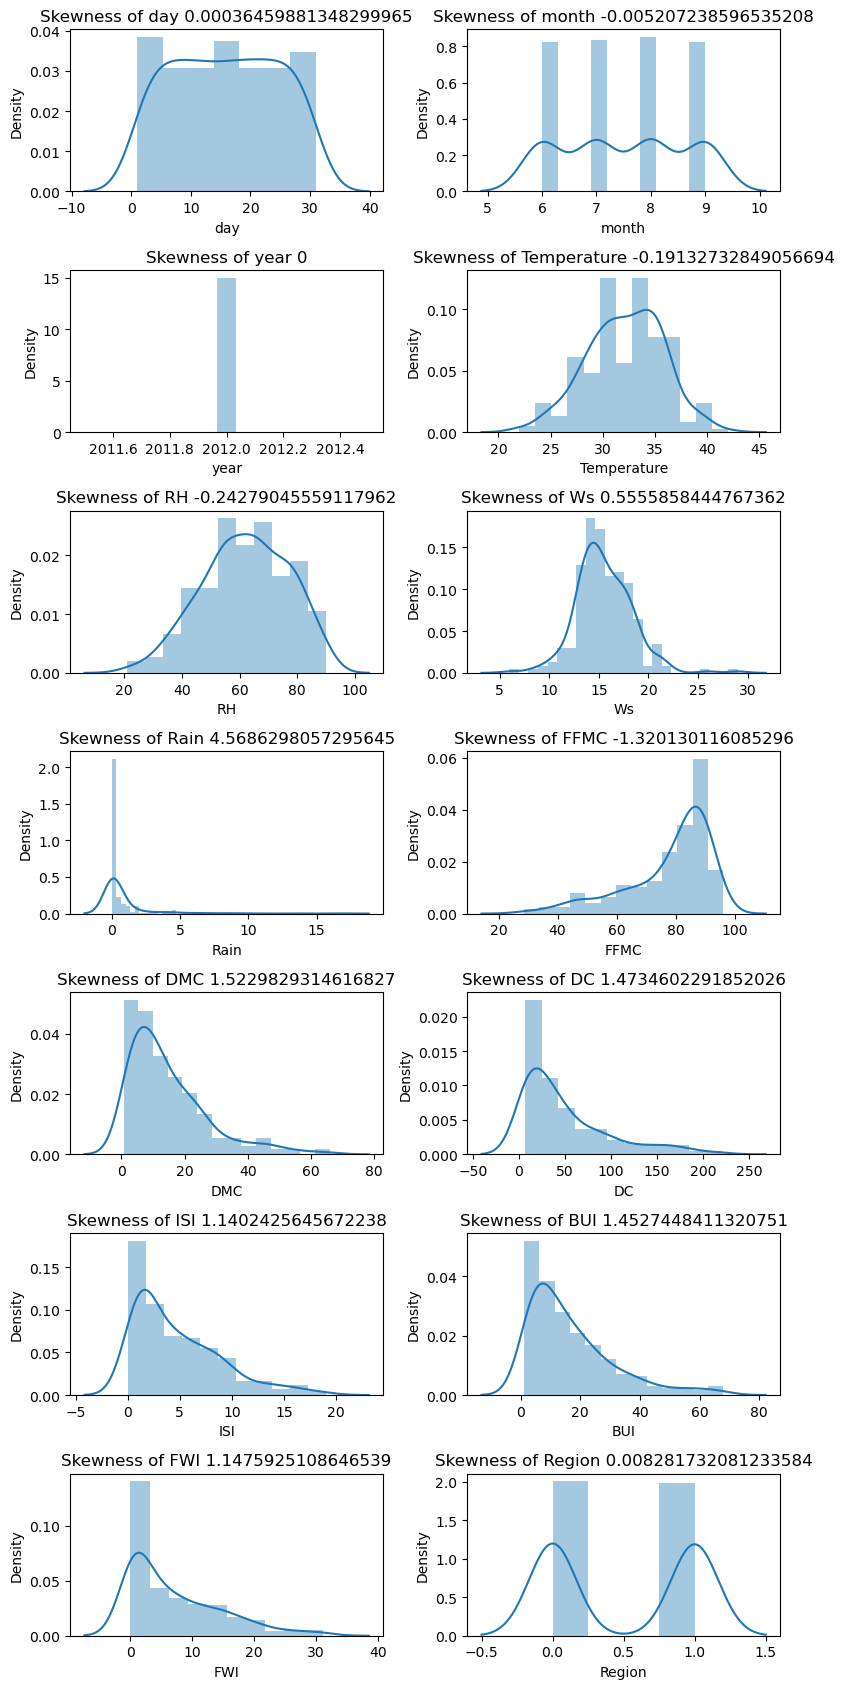

In [25]:
# Distt. Plot
t = 1
plt.figure(figsize=(8,17))
for i in nums_cols.columns:
    
    plt.subplot(7, 2, t)
    sns.distplot(nums_cols[i])
    t += 1
    plt.title(f"Skewness of {i} {nums_cols[i].skew()}")
#     plt.xlabel(i)
    plt.tight_layout()
plt.show()
    

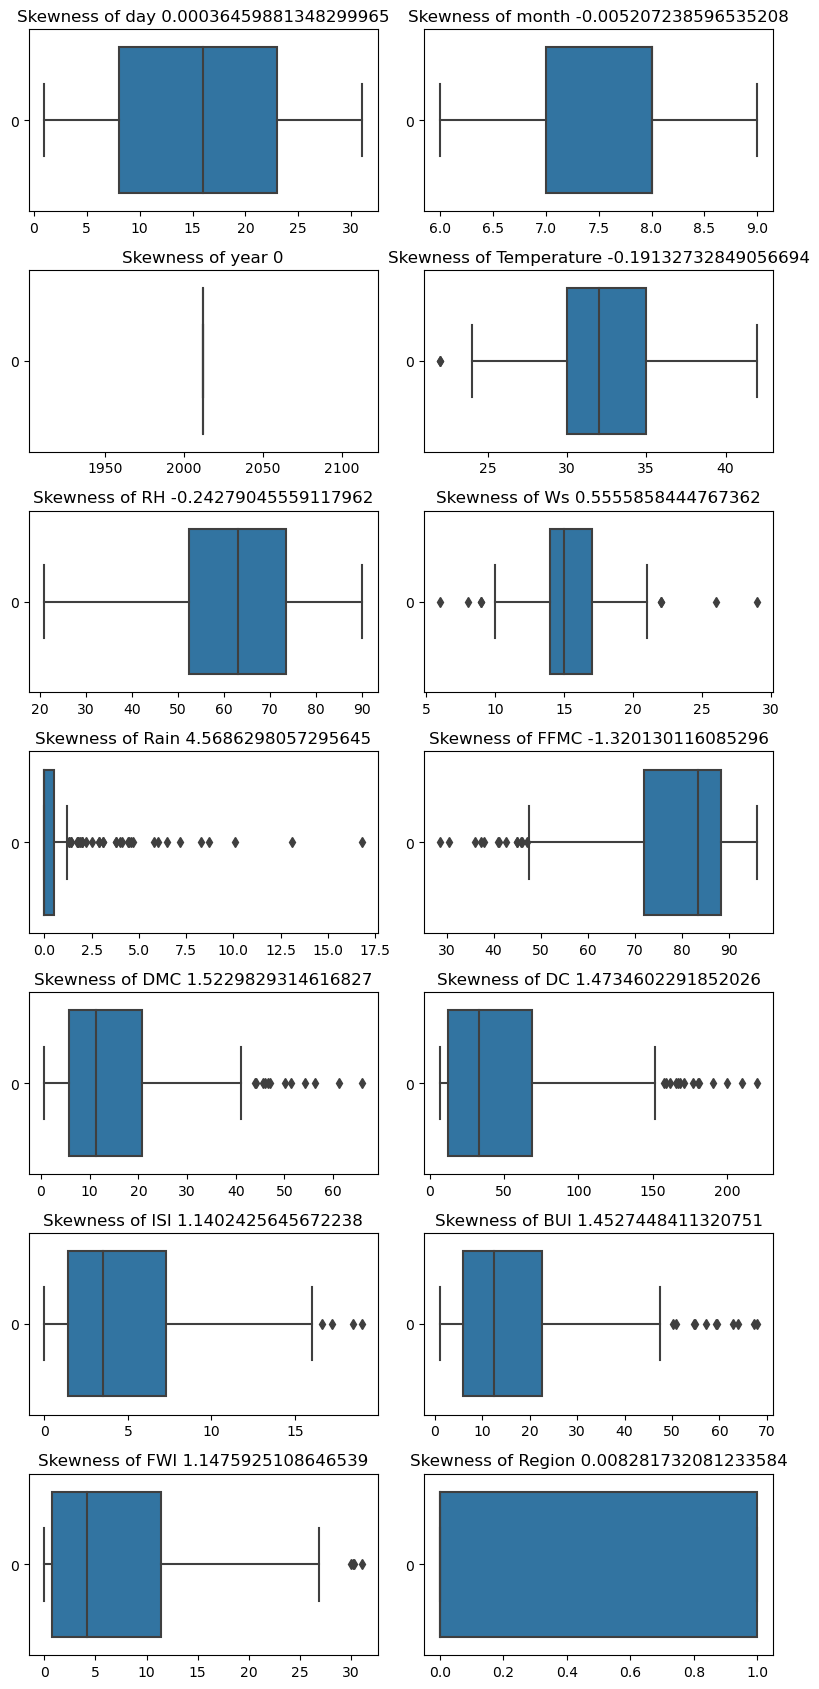

In [26]:
# Boxplot

t = 1
plt.figure(figsize=(8,17))
for i in nums_cols.columns:
    
    plt.subplot(7, 2, t)
    sns.boxplot(nums_cols[i], orient='h')
    t += 1
    plt.title(f"Skewness of {i} {nums_cols[i].skew()}")
#     plt.xlabel(i)
    plt.tight_layout()
plt.show()
    


### Infrence :
    Temperature and FWI : have slightly outlier
    Ws and FWI : have moderate outliers
    Rain, FFMC, DMC, DC and BUI  : have the most outliers

In [27]:
df['Classes'] = df['Classes'].str.strip()

In [28]:
# Cat columns
cat_col = cat_col.str.strip()

In [29]:
class_count = cat_col.value_counts()
class_count

Classes
fire        137
not fire    106
Name: count, dtype: int64

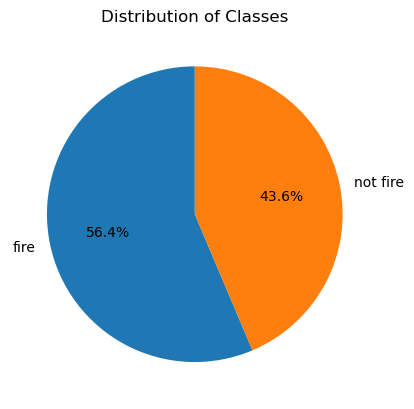

In [30]:
class_count.plot.pie(autopct = '%1.1f%%', startangle = 90)
plt.ylabel('')
plt.title("Distribution of Classes")
plt.show()

## Bivariant Analysis

<Figure size 1200x1200 with 0 Axes>

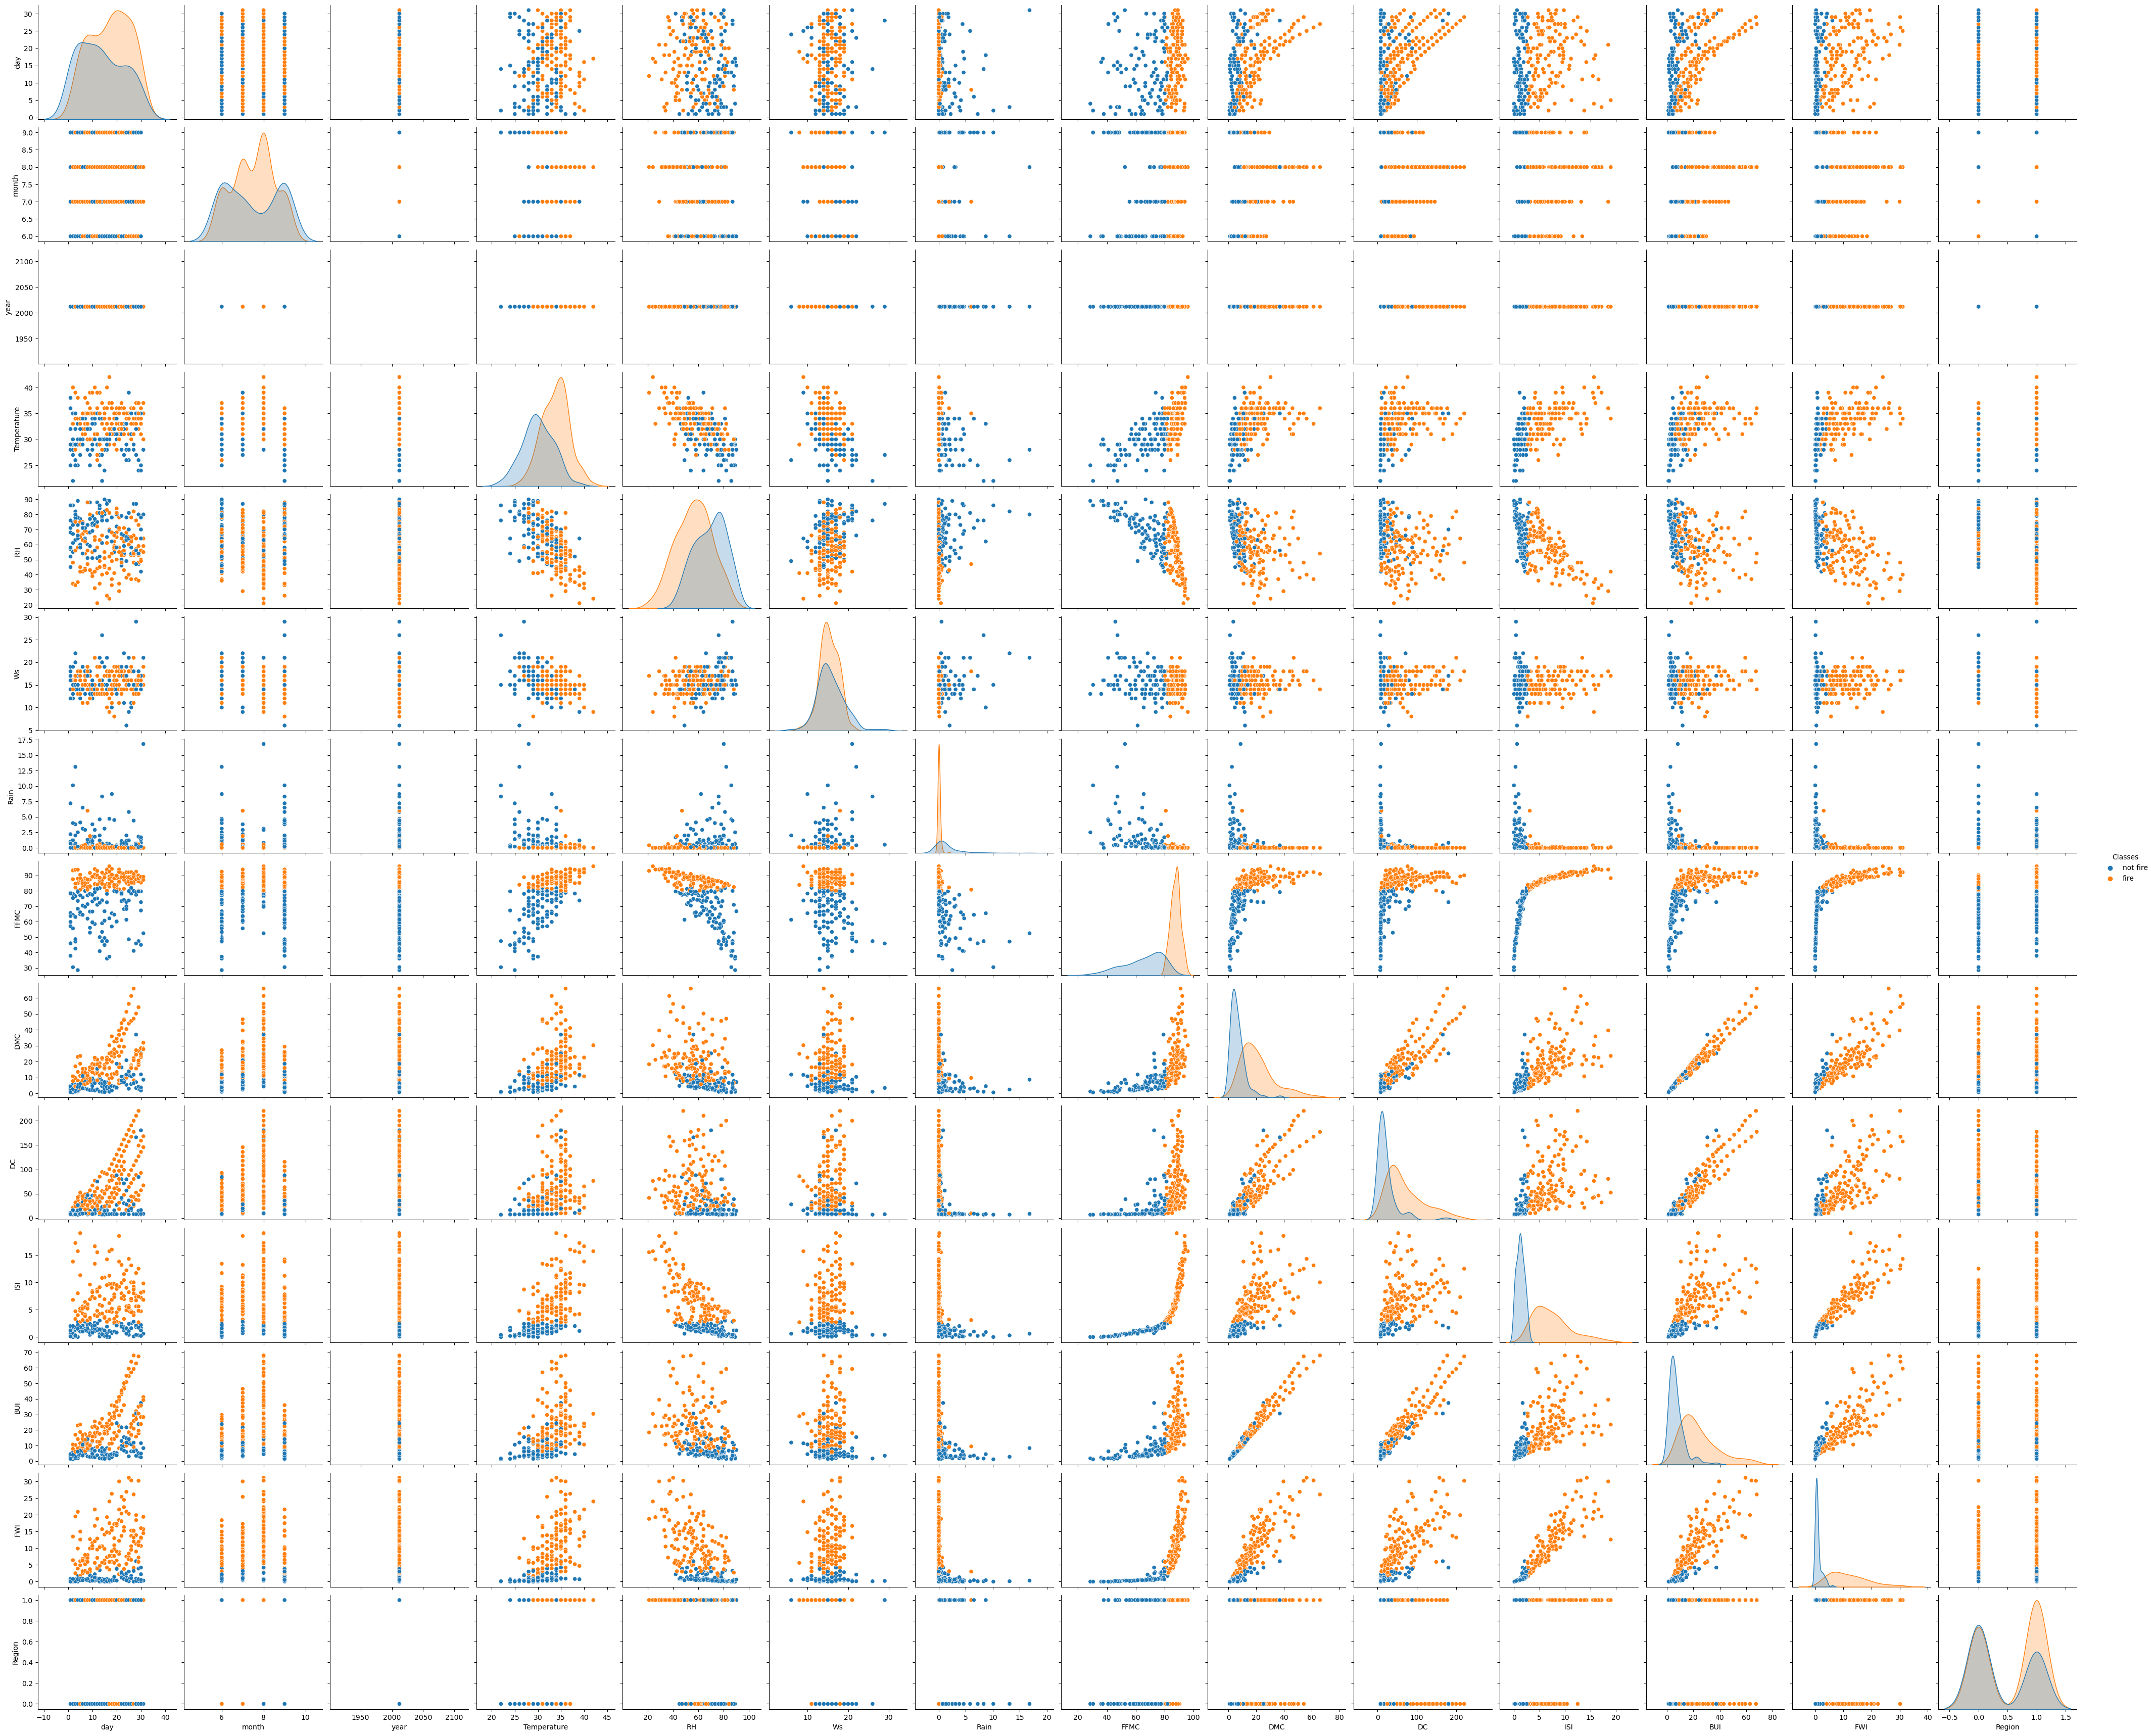

In [31]:
plt.figure(figsize=(12, 12))
sns.pairplot(df, hue='Classes', height=2.5, aspect=1.2)
plt.show()

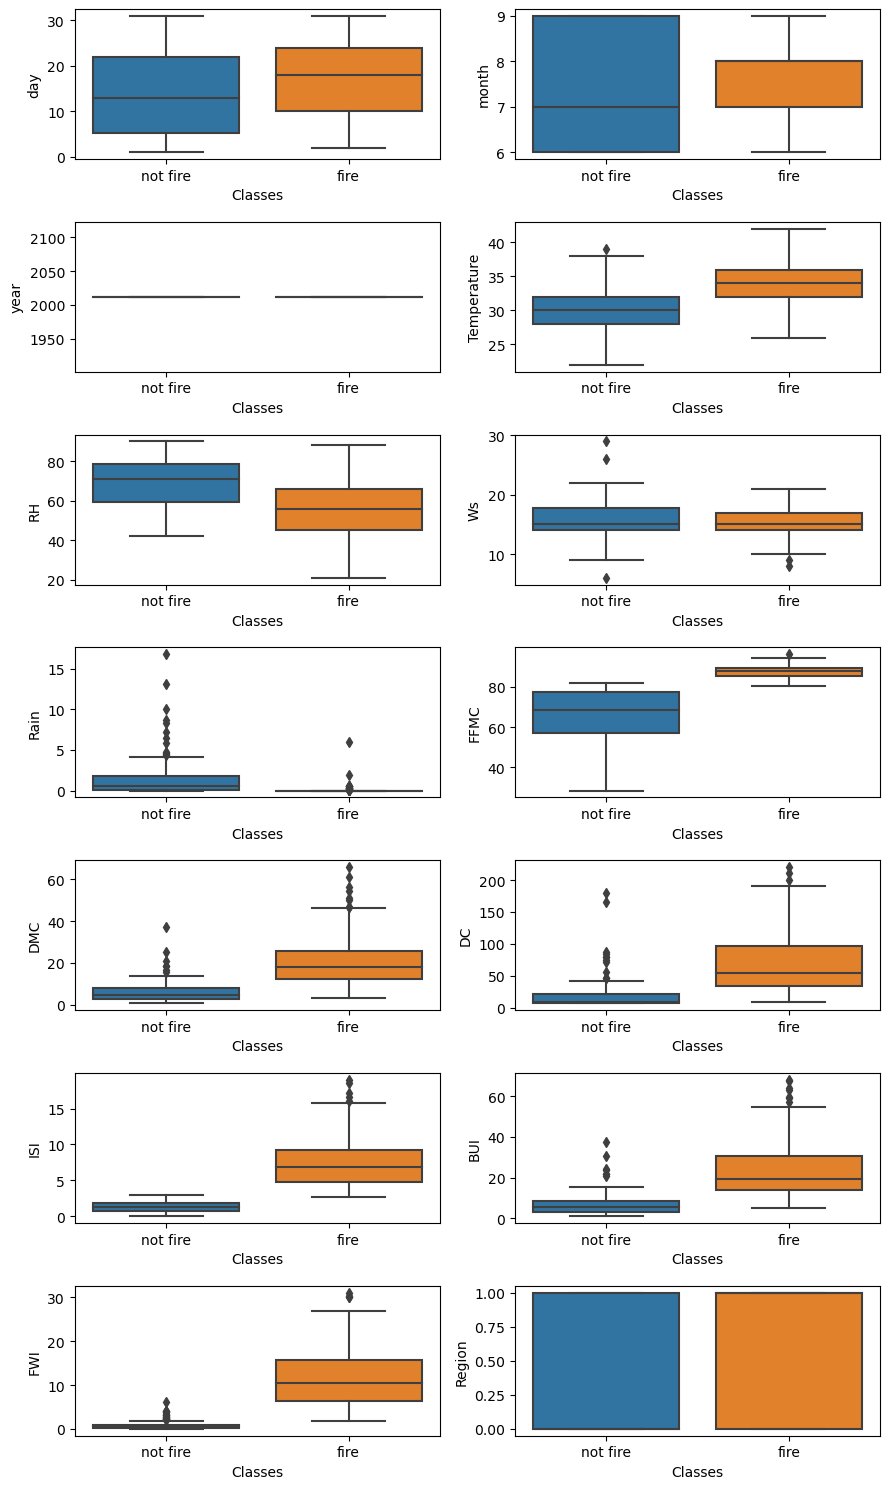

In [32]:
# Box-Plot

t = 1
plt.figure(figsize=(9,15))
for i in nums_cols.columns:
    plt.subplot(7,2,t)
    sns.boxplot(x = cat_col, y = nums_cols[i])
    t += 1
    plt.tight_layout()
plt.show()

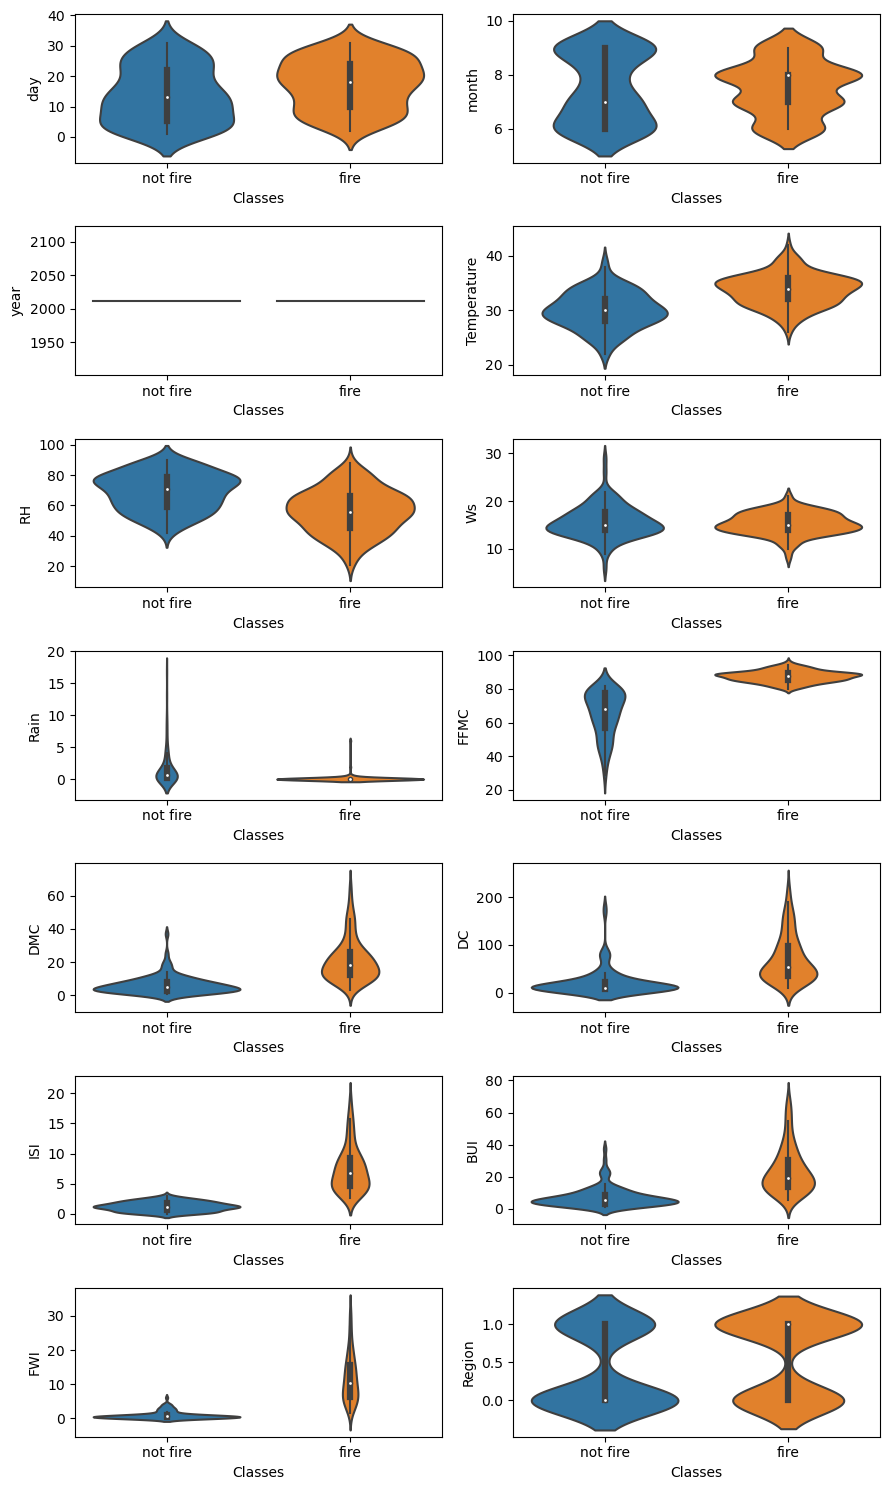

In [33]:
# Voilin-Plot

t = 1
plt.figure(figsize=(9,15))
for i in nums_cols.columns:
    plt.subplot(7,2,t)
    sns.violinplot(x = cat_col, y = nums_cols[i])
    t += 1
    plt.tight_layout()
plt.show()

In [34]:
df.shape

(243, 15)

In [35]:
# Data is Under-Sampled. So I am not removing it 

In [36]:
# remove irrelevant features 
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [37]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [38]:
# label Encode the Classes

df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0, 1)

In [39]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [40]:
# target variable 
y = df['FWI']
X = df.drop(columns=['FWI'], axis=1)

In [41]:
X

Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4        0       0
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9        0       0
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7        0       0
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7        0       0
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9        0       0
..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       1
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2        0       1
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4        0       1
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1        0       1
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8        0       1

[243 rows x 11 columns]

In [42]:
# Split the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [43]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [44]:
# Feature Selection based on Correlation
X_train.corr()

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.656095 -0.305977 -0.317512  0.694768  0.498173   
RH             -0.656095  1.000000  0.225736  0.241656 -0.653023 -0.414601   
Ws             -0.305977  0.225736  1.000000  0.251932 -0.190076  0.000379   
Rain           -0.317512  0.241656  0.251932  1.000000 -0.545491 -0.289754   
FFMC            0.694768 -0.653023 -0.190076 -0.545491  1.000000  0.620807   
DMC             0.498173 -0.414601  0.000379 -0.289754  0.620807  1.000000   
DC              0.390684 -0.236078  0.096576 -0.302341  0.524101  0.868647   
ISI             0.629848 -0.717804 -0.023558 -0.345707  0.750799  0.685656   
BUI             0.473609 -0.362317  0.035633 -0.300964  0.607210  0.983175   
Classes         0.542141 -0.456876 -0.082570 -0.369357  0.781259  0.617273   
Region          0.254549 -0.394665 -0.199969 -0.059022  0.249514  0.212582   

                   DC       ISI       BUI   Classes    Region  
Temperature  0.390684  0.629848  0.473609  0.542141  0.254549  
RH          -0.236078 -0.717804 -0.362317 -0.456876 -0.394665  
Ws           0.096576 -0.023558  0.035633 -0.082570 -0.199969  
Rain        -0.302341 -0.345707 -0.300964 -0.369357 -0.059022  
FFMC         0.524101  0.750799  0.607210  0.781259  0.249514  
DMC          0.868647  0.685656  0.983175  0.617273  0.212582  
DC           1.000000  0.513701  0.942414  0.543581 -0.060838  
ISI          0.513701  1.000000  0.643818  0.742977  0.296441  
BUI          0.942414  0.643818  1.000000  0.612239  0.114897  
Classes      0.543581  0.742977  0.612239  1.000000  0.188837  
Region      -0.060838  0.296441  0.114897  0.188837  1.000000

## Feature Selection

<Axes: >

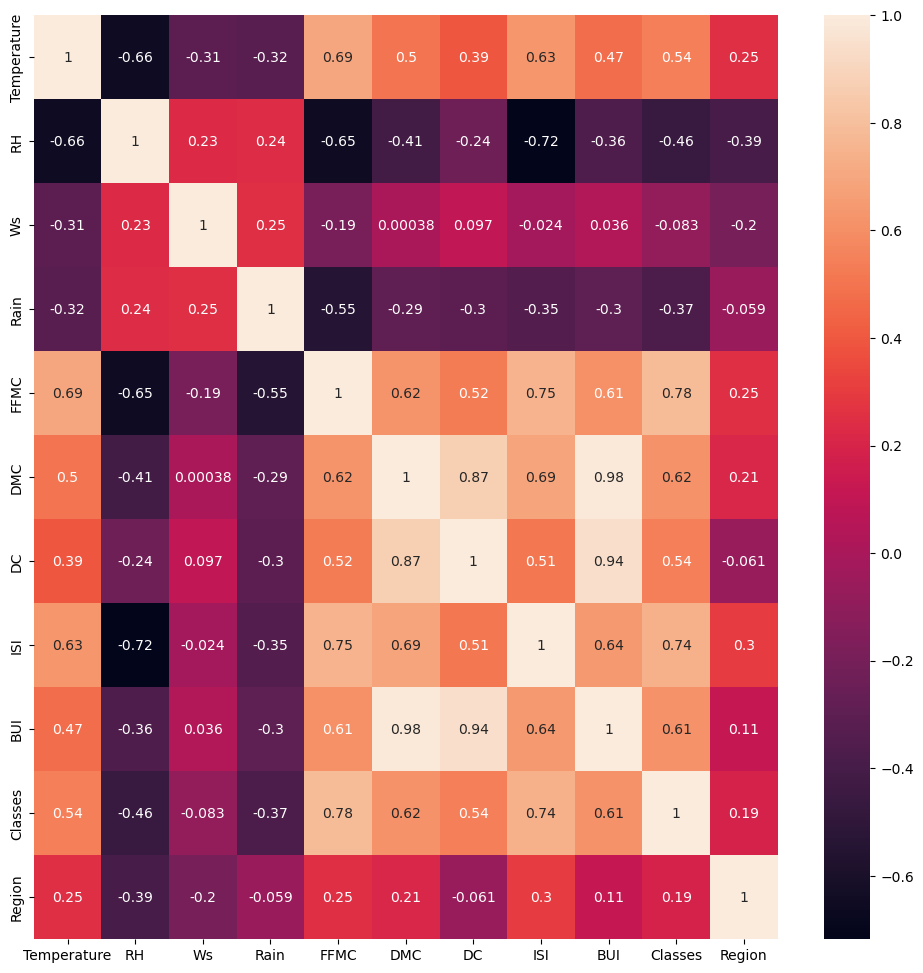

In [45]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train.corr(), annot=True)

In [47]:
corr_matrix = df.corr()

# for i in range(len(corr_matrix.columns))

In [48]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [49]:
corr_features = correlation(X_train, 0.85)

In [50]:
corr_features

{'BUI', 'DC'}

In [51]:
# drop feature when correlation is more than 0.85
X_train.drop(corr_features, axis= 1, inplace=True)
X_test.drop(corr_features, axis= 1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

## Scaling 

In [52]:
# using Standardization 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [53]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

## Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [55]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)


LinearRegression()

In [56]:
# accuracy on train data
y_pred_train = model_lr.predict(X_train_scaled)
# y_pred_train

In [57]:
r2_score(y_train, y_pred_train)

0.969907766275777

In [58]:
# on test data
y_pred_test = model_lr.predict(X_test_scaled)

In [59]:
r2_score(y_test, y_pred_test)

0.9847657384266952

In [60]:
# Overfiting 

## Lasso

In [61]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=1.5)
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.4103553557571622
R2 Score 0.9223014939630029


## Ridge

In [62]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5642305340105683
R2 Score 0.9842993364555513


In [71]:
y_test.values, y_pred

(array([ 8.4,  7.2,  0.5,  3.8,  6.5,  0.7,  2.5,  7.2,  0.9,  2.8,  0.4,
         6.1,  9.8, 17.3, 20.4,  1.3,  0.4,  0. ,  6.8,  3.1,  1.7,  0.4,
         5.9,  0.4, 20.9,  4.7,  5.6, 10.2,  0. ,  9.9,  6.3,  0.4, 10.6,
        15.7,  1.4,  0.9,  1.7,  5.5,  0.1,  0.2,  6.3,  1.7,  8.3,  0. ,
        15.7,  8. ,  7.7,  0.6, 13.2,  0.7, 30.3,  5.2, 16.7, 20.9, 15.3,
        13.7,  0.8,  9. ,  3.9, 15.4,  5.2]),
 array([ 8.440192  ,  8.48416748,  1.58398174,  5.74704744,  7.99925012,
         3.84543773,  4.65423145,  9.85746701,  2.41164568,  4.42033198,
         1.69311557,  9.29479476,  9.94989153, 14.80040551, 14.99184886,
         3.85114187,  2.99061658, -0.97985369,  7.64927581,  6.40186267,
         2.76037744,  0.786395  ,  7.65023687,  1.04550366, 17.05166573,
         8.10156058,  7.10480686,  9.72405017, -1.63030854,  9.98040215,
         6.77739365,  1.80475174,  9.66423333, 12.61018368,  3.22848878,
         2.95760651,  4.2159643 ,  8.47055095, -0.0452998 , -0.22390909,


## Elasticnet Regression

In [63]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.8822353634896
R2 Score 0.8753460589519703


In [64]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')

In [65]:
import pickle


In [67]:
import pickle
pickle.dump(sc,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [72]:
X_train.head(3)

Temperature  RH  Ws  Rain  FFMC   DMC   ISI  Classes  Region
97            29  74  19   0.1  75.8   3.6   2.1        0       0
141           31  72  14   0.2  60.2   3.8   0.8        0       1
192           40  31  15   0.0  94.2  22.5  16.6        1       1